In [53]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Pivot Table

In [14]:
df = sns.load_dataset("Tips").drop(["day","time"],axis=1)
df

,total_bill,tip,sex,smoker,size
0,16.99,1.01,Female,No,2
1,10.34,1.66,Male,No,3
2,21.01,3.50,Male,No,3
3,23.68,3.31,Male,No,2
4,24.59,3.61,Female,No,4
...,...,...,...,...,...
239,29.03,5.92,Male,No,3
240,27.18,2.00,Female,Yes,2
241,22.67,2.00,Male,Yes,2
242,17.82,1.75,Male,No,2


In [15]:
df.groupby(["sex","smoker"])[["total_bill"]].mean().unstack()

total_bill           
smoker         No        Yes
sex                         
Female  18.105185  17.977879
Male    19.791237  22.284500

In [16]:
df.pivot_table(index="sex",columns="smoker",values="total_bill")

smoker,No,Yes
sex,,
Female,18.105185,17.977879
Male,19.791237,22.284500


In [17]:
# aggfunc
df.pivot_table(index="sex",columns="smoker",values="total_bill",aggfunc="sum")

smoker,No,Yes
sex,,
Female,977.68,593.27
Male,1919.75,1337.07


In [19]:
# all columns together
df.pivot_table(index="sex",columns="smoker")

size                 tip           total_bill           
smoker        No       Yes        No       Yes         No        Yes
sex                                                                 
Female  2.592593  2.242424  2.773519  2.931515  18.105185  17.977879
Male    2.711340  2.500000  3.113402  3.051167  19.791237  22.284500

In [20]:
df1 = sns.load_dataset("Tips")
df1

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [25]:
df1.pivot_table(index=["sex","smoker"],columns=["day","time"],aggfunc={'size':'mean','tip':'max','total_bill':'sum'})

size                                                   tip  \
day              Fri                 Sat       Sun   Thur              Fri   
time          Dinner     Lunch    Dinner    Dinner Dinner     Lunch Dinner   
sex    smoker                                                                
Female No        2.0  3.000000  2.307692  3.071429    2.0  2.500000   3.25   
       Yes       2.0  2.000000  2.200000  2.500000    NaN  2.428571   4.30   
Male   No        2.0       NaN  2.656250  2.883721    NaN  2.500000   3.50   
       Yes       2.4  1.666667  2.629630  2.600000    NaN  2.300000   4.73   

                                               total_bill                 \
day                    Sat    Sun   Thur              Fri            Sat   
time          Lunch Dinner Dinner Dinner Lunch     Dinner  Lunch  Dinner   
sex    smoker                                                              
Female No      3.00   4.67    5.2    3.0  5.17      22.75  15.98  247.05   
       Yes     3.48   6.50    4.0    NaN  5.00      48.80  39.78  304.00   
Male   No       NaN   9.00    6.0    NaN  6.70      34.95    NaN  637.73   
       Yes     2.20  10.00    6.5    NaN  5.00     129.46  34.16  589.62   

                                      
day               Sun   Thur          
time           Dinner Dinner   Lunch  
sex    smoker                         
Female No      291.54  18.78  381.58  
       Yes      66.16    NaN  134.53  
Male   No      877.34    NaN  369.73  
       Yes     392.12    NaN  191.71

In [31]:
df1.pivot_table(index="sex", columns="smoker", values=["total_bill"], margins=True)

total_bill                      
smoker         No        Yes        All
sex                                    
Female  18.105185  17.977879  18.056897
Male    19.791237  22.284500  20.744076
All     19.188278  20.756344  19.785943

In [33]:
# plotting graphs
df = pd.read_csv("expense_data.csv")
df

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1
0,3/2/2022 10:11,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0
1,3/2/2022 10:11,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0
2,3/1/2022 19:50,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0
3,3/1/2022 18:56,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0
4,3/1/2022 18:22,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0
...,...,...,...,...,...,...,...,...,...,...,...
272,11/22/2021 14:16,CUB - online payment,Food,NaN,Dinner,90.0,Expense,NaN,90.0,INR,90.0
273,11/22/2021 14:16,CUB - online payment,Food,NaN,Lunch with company,97.0,Expense,NaN,97.0,INR,97.0
274,11/21/2021 17:07,CUB - online payment,Transportation,NaN,Rapido,130.0,Expense,NaN,130.0,INR,130.0
275,11/21/2021 15:50,CUB - online payment,Food,NaN,Lunch,875.0,Expense,NaN,875.0,INR,875.0


In [35]:
df["Category"].value_counts()

Category
Food                156
Other                60
Transportation       31
Apparel               7
Household             6
Allowance             6
Social Life           5
Education             1
Salary                1
Self-development      1
Beauty                1
Gift                  1
Petty cash            1
Name: count, dtype: int64

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            277 non-null    object 
 1   Account         277 non-null    object 
 2   Category        277 non-null    object 
 3   Subcategory     0 non-null      float64
 4   Note            273 non-null    object 
 5   INR             277 non-null    float64
 6   Income/Expense  277 non-null    object 
 7   Note.1          0 non-null      float64
 8   Amount          277 non-null    float64
 9   Currency        277 non-null    object 
 10  Account.1       277 non-null    float64
dtypes: float64(5), object(6)
memory usage: 23.9+ KB


In [38]:
df["Date"]= pd.to_datetime(df["Date"])

In [40]:
df["month"]=df["Date"].dt.month_name()

<Axes: xlabel='month'>

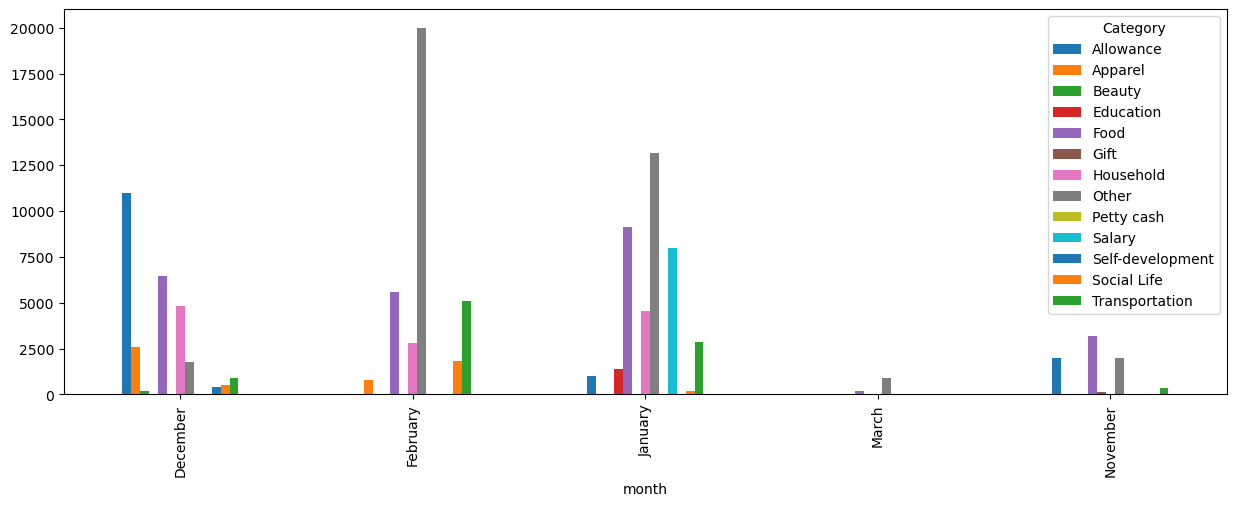

In [64]:

df.pivot_table(index="month", columns="Category", values="INR", aggfunc="sum", fill_value=0).plot(kind="bar",figsize=(15,5))

# Vectorized Strings

In [65]:
# How pandas solves this issue?
s = pd.Series(["cat",'mat' ,None, 'rat'])
# string accessor
s.str.startswith('c')

0     True
1    False
2     None
3    False
dtype: object

In [68]:
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [70]:
df["Name"]

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [71]:
df["Name"].str.lower()

0                                braund, mr. owen harris
1      cumings, mrs. john bradley (florence briggs th...
2                                 heikkinen, miss. laina
3           futrelle, mrs. jacques heath (lily may peel)
4                               allen, mr. william henry
                             ...                        
886                                montvila, rev. juozas
887                         graham, miss. margaret edith
888             johnston, miss. catherine helen "carrie"
889                                behr, mr. karl howell
890                                  dooley, mr. patrick
Name: Name, Length: 891, dtype: object

In [72]:
df["Name"].str.split(",")

0                             [Braund,  Mr. Owen Harris]
1      [Cumings,  Mrs. John Bradley (Florence Briggs ...
2                              [Heikkinen,  Miss. Laina]
3        [Futrelle,  Mrs. Jacques Heath (Lily May Peel)]
4                            [Allen,  Mr. William Henry]
                             ...                        
886                             [Montvila,  Rev. Juozas]
887                      [Graham,  Miss. Margaret Edith]
888          [Johnston,  Miss. Catherine Helen "Carrie"]
889                             [Behr,  Mr. Karl Howell]
890                               [Dooley,  Mr. Patrick]
Name: Name, Length: 891, dtype: object

In [ ]:
df["Name"].str.len().max()

82

In [79]:
df["Name"][df["Name"].str.len()==82].values[0]

'Penasco y Castellana, Mrs. Victor de Satode (Maria Josefa Perez de Soto y Vallejo)'

In [74]:
df["Name"].str.capitalize()

0                                Braund, mr. owen harris
1      Cumings, mrs. john bradley (florence briggs th...
2                                 Heikkinen, miss. laina
3           Futrelle, mrs. jacques heath (lily may peel)
4                               Allen, mr. william henry
                             ...                        
886                                Montvila, rev. juozas
887                         Graham, miss. margaret edith
888             Johnston, miss. catherine helen "carrie"
889                                Behr, mr. karl howell
890                                  Dooley, mr. patrick
Name: Name, Length: 891, dtype: object

In [80]:
df["Name"].str.strip()

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [91]:
df["lastname"]=df["Name"].str.split(",").str.get(0)
# for surname
df["lastname"]

0         Braund
1        Cumings
2      Heikkinen
3       Futrelle
4          Allen
         ...    
886     Montvila
887       Graham
888     Johnston
889         Behr
890       Dooley
Name: lastname, Length: 891, dtype: object

In [90]:
df[["title","firstname"]]=df["Name"].str.split(",").str.get(1).str.strip().str.split(" ",n=1,expand=True)
# n tells us the no of splits required like here we wwanted to just get the full name
# expand converts series to dataframe
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title,firstname
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.,Owen Harris
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.,John Bradley (Florence Briggs Thayer)
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.,Laina
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.,Jacques Heath (Lily May Peel)
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.,William Henry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev.,Juozas
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss.,Margaret Edith
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss.,"Catherine Helen ""Carrie"""
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr.,Karl Howell


In [92]:
df[df["firstname"].str.contains('john',case=False)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title,firstname,lastname
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.,John Bradley (Florence Briggs Thayer),Cumings
41,42,0,2,"Turpin, Mrs. William John Robert (Dorothy Ann ...",female,27.0,1,0,11668,21.0000,NaN,S,Mrs.,William John Robert (Dorothy Ann Wonnacott),Turpin
45,46,0,3,"Rogers, Mr. William John",male,NaN,0,0,S.C./A.4. 23567,8.0500,NaN,S,Mr.,William John,Rogers
98,99,1,2,"Doling, Mrs. John T (Ada Julia Bone)",female,34.0,0,1,231919,23.0000,NaN,S,Mrs.,John T (Ada Julia Bone),Doling
112,113,0,3,"Barton, Mr. David John",male,22.0,0,0,324669,8.0500,NaN,S,Mr.,David John,Barton
117,118,0,2,"Turpin, Mr. William John Robert",male,29.0,1,0,11668,21.0000,NaN,S,Mr.,William John Robert,Turpin
160,161,0,3,"Cribb, Mr. John Hatfield",male,44.0,0,1,371362,16.1000,NaN,S,Mr.,John Hatfield,Cribb
162,163,0,3,"Bengtsson, Mr. John Viktor",male,26.0,0,0,347068,7.7750,NaN,S,Mr.,John Viktor,Bengtsson
165,166,1,3,"Goldsmith, Master. Frank John William ""Frankie""",male,9.0,0,2,363291,20.5250,NaN,S,Master.,"Frank John William ""Frankie""",Goldsmith
168,169,0,1,"Baumann, Mr. John D",male,NaN,0,0,PC 17318,25.9250,NaN,S,Mr.,John D,Baumann


# Timestamp Object

In [94]:
pd.Timestamp('2025/03/04')
# year/month/day

Timestamp('2025-03-04 00:00:00')

In [95]:
pd.Timestamp('2025')

Timestamp('2025-01-01 00:00:00')

In [97]:
pd.Timestamp('5th march 2025 9:21pm')

Timestamp('2025-03-05 21:21:00')

In [99]:
import datetime as dt
dt.datetime(2025,3,5)

datetime.datetime(2025, 3, 5, 0, 0)

In [101]:
x = pd.Timestamp(dt.datetime(2025,3,5))
x

Timestamp('2025-03-05 00:00:00')

In [102]:
x.year

2025

In [103]:
x.month

3

In [105]:
x.month_name()

'March'

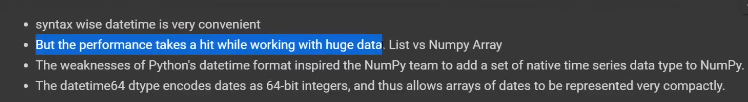

# Datetime Index Object

In [4]:
pd.DatetimeIndex(['2023/1/1','2022/1/1','2021/1/1'])

DatetimeIndex(['2023-01-01', '2022-01-01', '2021-01-01'], dtype='datetime64[ns]', freq=None)

```js
in order to store one single date we have timeindex object and multiple dates we have datetimeindex object
```

In [8]:
pd.DatetimeIndex([dt.datetime(2023,1,1),dt.datetime(2022,1,1)])

DatetimeIndex(['2023-01-01', '2022-01-01'], dtype='datetime64[ns]', freq=None)

In [9]:
pd.DatetimeIndex([pd.Timestamp(2023,1,1),pd.Timestamp(2022,1,1)])

DatetimeIndex(['2023-01-01', '2022-01-01'], dtype='datetime64[ns]', freq=None)

In [5]:
pd.date_range(start="2023/1/1",end="2023/2/1",freq="D")
# for alternate days D to 2D

DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
               '2023-01-09', '2023-01-10', '2023-01-11', '2023-01-12',
               '2023-01-13', '2023-01-14', '2023-01-15', '2023-01-16',
               '2023-01-17', '2023-01-18', '2023-01-19', '2023-01-20',
               '2023-01-21', '2023-01-22', '2023-01-23', '2023-01-24',
               '2023-01-25', '2023-01-26', '2023-01-27', '2023-01-28',
               '2023-01-29', '2023-01-30', '2023-01-31', '2023-02-01'],
              dtype='datetime64[ns]', freq='D')

In [7]:
pd.date_range(start="2023/1/1",end="2023/2/1",freq="B")
# B stands for business days only from Monday to Friday

DatetimeIndex(['2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05',
               '2023-01-06', '2023-01-09', '2023-01-10', '2023-01-11',
               '2023-01-12', '2023-01-13', '2023-01-16', '2023-01-17',
               '2023-01-18', '2023-01-19', '2023-01-20', '2023-01-23',
               '2023-01-24', '2023-01-25', '2023-01-26', '2023-01-27',
               '2023-01-30', '2023-01-31', '2023-02-01'],
              dtype='datetime64[ns]', freq='B')

In [9]:
pd.date_range(start="2023/1/1",end="2023/2/1",freq="W")
# W for weekends

DatetimeIndex(['2023-01-01', '2023-01-08', '2023-01-15', '2023-01-22',
               '2023-01-29'],
              dtype='datetime64[ns]', freq='W-SUN')

In [11]:
pd.date_range(start="2023/1/1",end="2023/2/1",freq="W-Thu")
# only thursdays

DatetimeIndex(['2023-01-05', '2023-01-12', '2023-01-19', '2023-01-26'], dtype='datetime64[ns]', freq='W-THU')

In [12]:
pd.date_range(start="2023/1/1",end="2023/2/1",freq="H")
# H stands for hourly basis

C:\Users\hp\AppData\Local\Temp\ipykernel_14224\3646869819.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  pd.date_range(start="2023/1/1",end="2023/2/1",freq="H")


DatetimeIndex(['2023-01-01 00:00:00', '2023-01-01 01:00:00',
               '2023-01-01 02:00:00', '2023-01-01 03:00:00',
               '2023-01-01 04:00:00', '2023-01-01 05:00:00',
               '2023-01-01 06:00:00', '2023-01-01 07:00:00',
               '2023-01-01 08:00:00', '2023-01-01 09:00:00',
               ...
               '2023-01-31 15:00:00', '2023-01-31 16:00:00',
               '2023-01-31 17:00:00', '2023-01-31 18:00:00',
               '2023-01-31 19:00:00', '2023-01-31 20:00:00',
               '2023-01-31 21:00:00', '2023-01-31 22:00:00',
               '2023-01-31 23:00:00', '2023-02-01 00:00:00'],
              dtype='datetime64[ns]', length=745, freq='h')

In [13]:
pd.date_range(start="2023/1/1",end="2023/2/1",freq="6H")

C:\Users\hp\AppData\Local\Temp\ipykernel_14224\3159411054.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  pd.date_range(start="2023/1/1",end="2023/2/1",freq="6H")


DatetimeIndex(['2023-01-01 00:00:00', '2023-01-01 06:00:00',
               '2023-01-01 12:00:00', '2023-01-01 18:00:00',
               '2023-01-02 00:00:00', '2023-01-02 06:00:00',
               '2023-01-02 12:00:00', '2023-01-02 18:00:00',
               '2023-01-03 00:00:00', '2023-01-03 06:00:00',
               ...
               '2023-01-29 18:00:00', '2023-01-30 00:00:00',
               '2023-01-30 06:00:00', '2023-01-30 12:00:00',
               '2023-01-30 18:00:00', '2023-01-31 00:00:00',
               '2023-01-31 06:00:00', '2023-01-31 12:00:00',
               '2023-01-31 18:00:00', '2023-02-01 00:00:00'],
              dtype='datetime64[ns]', length=125, freq='6h')

In [16]:
pd.date_range(start="2023/1/1",end="2023/2/1",freq="ME")
# M stands for Month

DatetimeIndex(['2023-01-31'], dtype='datetime64[ns]', freq='ME')

In [17]:
pd.date_range(start="2023/1/1",end="2023/2/1",freq="MS")
# MS for month start

DatetimeIndex(['2023-01-01', '2023-02-01'], dtype='datetime64[ns]', freq='MS')

In [19]:
pd.date_range(start="2023/1/1",end="2023/2/1",freq="YE")

DatetimeIndex([], dtype='datetime64[ns]', freq='YE-DEC')

In [23]:
pd.date_range(start="2023/1/1",periods=25,freq="h")
# next 25 days on hourly basis

DatetimeIndex(['2023-01-01 00:00:00', '2023-01-01 01:00:00',
               '2023-01-01 02:00:00', '2023-01-01 03:00:00',
               '2023-01-01 04:00:00', '2023-01-01 05:00:00',
               '2023-01-01 06:00:00', '2023-01-01 07:00:00',
               '2023-01-01 08:00:00', '2023-01-01 09:00:00',
               '2023-01-01 10:00:00', '2023-01-01 11:00:00',
               '2023-01-01 12:00:00', '2023-01-01 13:00:00',
               '2023-01-01 14:00:00', '2023-01-01 15:00:00',
               '2023-01-01 16:00:00', '2023-01-01 17:00:00',
               '2023-01-01 18:00:00', '2023-01-01 19:00:00',
               '2023-01-01 20:00:00', '2023-01-01 21:00:00',
               '2023-01-01 22:00:00', '2023-01-01 23:00:00',
               '2023-01-02 00:00:00'],
              dtype='datetime64[ns]', freq='h')

In [25]:
s = pd.Series(['2023/1/1','2022/2/1','2033/5/1'])
pd.to_datetime(s)

0   2023-01-01
1   2022-02-01
2   2033-05-01
dtype: datetime64[ns]

In [26]:
pd.to_datetime(s).dt.month

0    1
1    2
2    5
dtype: int32

In [28]:
pd.to_datetime(s).dt.month_name()

0     January
1    February
2         May
dtype: object

#### to handle errors

In [30]:
s = pd.Series(['2023/1/1','2022/2/1','2033/15/1'])
pd.to_datetime(s,errors='coerce')

0   2023-01-01
1   2022-02-01
2          NaT
dtype: datetime64[ns]